In [1]:
from keras.datasets import fashion_mnist
(train_x, train_y), (test_x, text_y) = fashion_mnist.load_data()
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


4423680/4422102 [==============================] - 4s 1us/step


In [0]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
test_y=text_y

In [3]:
print("Training data size", train_x.shape, train_y.shape)
print("Test data size", test_x.shape, test_y.shape)

Training data size (60000, 28, 28) (60000,)
Test data size (10000, 28, 28) (10000,)


In [4]:
#Find unique numbers from train lables
classes = np.unique(train_y)
nclasses=len(classes)
print('Total number of outputs: ', nclasses)
print('Output classes', classes)

Total number of outputs:  10
Output classes [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth :9')

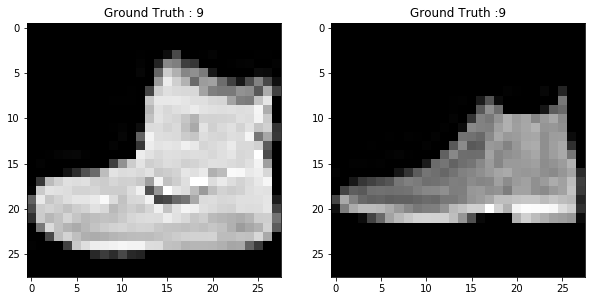

In [5]:
plt.figure(figsize=[10,10])
#display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_y[0]))

#Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='gray')
plt.title("Ground Truth :{}".format(test_y[0]))



# Preprocessing data

In [6]:
#convert each 28*28 image of the data to a 3 D matrix of size 28*28*1 before feeding into network
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)
train_x.shape, train_x.shape


((60000, 28, 28, 1), (60000, 28, 28, 1))

In [0]:
#data is in int 8 format, so change it to float32 before feeding into the network
#rescale the pixel values (in range 0 to 1)
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x/255.
test_x = test_x/255.

In [8]:
#convert class labels into one hot encoding vectors
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

print( "Orignal label {}".format(train_y[0]) )
print("modified label {}".format(train_y_one_hot[0]))

Orignal label 9
modified label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_label, valid_label = train_test_split(train_x, train_y_one_hot, test_size=0.2, random_state=13)

train_x.shape, valid_x.shape, train_label.shape ,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# The Network

##### Architecture of Model
###### Using three convolution layer
###### The first layer will have 32 - 3*3 filters
###### The second layer will have 64 - 3*3 filters
###### The third layer will have 128 - 3*3 filters
###### In addition , there are three maxpooling layers of 2*2


In [0]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In Keras, you can just stack up layers by adding the desired layer one by one
Add first convolutional layer witch Conv2D() because of images
Leaky ReLU has been dded as activation because of non linear decision boundary 
Add maxpooling layer using MaxPooling2D()
Last layer is a Dense Layer that has a softmax activation function with 10 units for this multi-classfication task


In [12]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (28,28,1), padding = 'same' ))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Conv2D (64, kernel_size = (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(Conv2D(128, kernel_size = (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(Dense(num_classes, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.


###### Compile using Adam optimizer

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [14]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [15]:
# Training model using keras.fit() function. Model will train for 20 epochs.
# .fit() function will return a history object which can be used later to polt accuracy and loss function

fashion_train = fashion_model.fit(train_x, train_label, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(valid_x, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 211us/step - loss: 0.4679 - acc: 0.8304 - val_loss: 0.3420 - val_acc: 0.8759
Epoch 2/20
48000/48000 [==============================] - 4s 94us/step - loss: 0.2882 - acc: 0.8956 - val_loss: 0.2824 - val_acc: 0.8972
Epoch 3/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.2420 - acc: 0.9113 - val_loss: 0.2472 - val_acc: 0.9116
Epoch 4/20
48000/48000 [==============================] - 4s 93us/step - loss: 0.2058 - acc: 0.9248 - val_loss: 0.2422 - val_acc: 0.9146
Epoch 5/20
48000/48000 [==============================] - 5s 94us/step - loss: 0.1811 - acc: 0.9338 - val_loss: 0.2319 - val_acc: 0.9143
Epoch 6/20
48000/48000 [==============================] - 4s 92us/step - loss: 0.1588 - acc: 0.9408 - val_loss: 0.2341 - val_acc: 0.9196
Epoch 7/20
48000/48000 [==============================] - 4s 93us/step - loss:

In [0]:
# save this model
fashion_model.save("fashion_cnn_model.h5py")

In [17]:
test_eval = fashion_model.evaluate(test_x, test_y_one_hot, verbose=0)
print("Test loss: {}".format(test_eval[0]))
print("Test Accuracy: {}".format(test_eval[1]))

Test loss: 0.4442824930947274
Test Accuracy: 0.9115


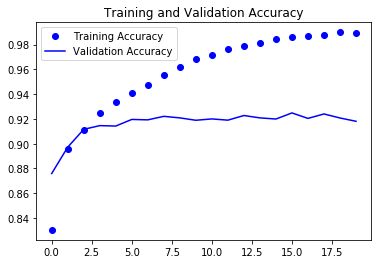

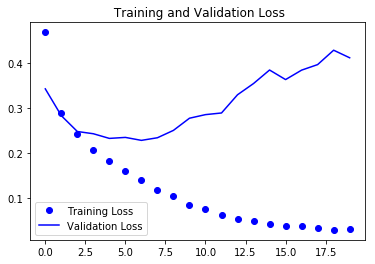

In [18]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title(' Training and Validation Loss')
plt.legend()
plt.show()

From the above two plots we can see that validation accuracy becomes stagnant after 4-5 epochs. Case of Overfitting. 

#### Adding DropOut in the Network

Dropdown randomly turns off a fraction of neurons during the training process reducing the dependency on the training set. How many fraction of neurons to turn off can be tuned using a hyperparameter. This way, turing off some neurons will not allow the network to memorize the training data

In [19]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', padding = 'same', input_shape = (28,28,1)))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
# import pdb; pdb.set_trace()
fashion_model.add(Dropout(.25))
fashion_model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation = 'softmax'))

fashion_model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
___________________________

In [21]:
fashion_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics=['accuracy'])
fashion_train_dropout = fashion_model.fit(train_x, train_label, batch_size=batch_size, epochs=epochs, verbose = 1, validation_data = (valid_x, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.6025 - acc: 0.7751 - val_loss: 0.3729 - val_acc: 0.8639
Epoch 2/20
48000/48000 [==============================] - 5s 104us/step - loss: 0.3789 - acc: 0.8609 - val_loss: 0.3015 - val_acc: 0.8889
Epoch 3/20
48000/48000 [==============================] - 5s 104us/step - loss: 0.3304 - acc: 0.8776 - val_loss: 0.2793 - val_acc: 0.8981
Epoch 4/20
48000/48000 [==============================] - 5s 104us/step - loss: 0.3021 - acc: 0.8884 - val_loss: 0.2654 - val_acc: 0.8983
Epoch 5/20
48000/48000 [==============================] - 5s 104us/step - loss: 0.2851 - acc: 0.8930 - val_loss: 0.2531 - val_acc: 0.9078
Epoch 6/20
48000/48000 [==============================] - 5s 105us/step - loss: 0.2723 - acc: 0.8986 - val_loss: 0.2452 - val_acc: 0.9079
Epoch 7/20
48000/48000 [==============================] - 5s 105us/step - loss: 0.2566 - acc: 0.9035 - val_loss: 0.2373 - 

In [0]:
fashion_model.save("fashion_model_dropout.h5py")

In [23]:
test_eval = fashion_model.evaluate(test_x, test_y_one_hot, verbose = 1)

10000/10000 [==============================] - 1s 63us/step


In [24]:
print("Test loss:", test_eval[0])
print("Test Accuracy: ", test_eval[1])

Test loss: 0.22297314703464508
Test Accuracy:  0.9202


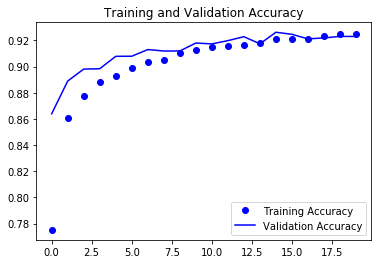

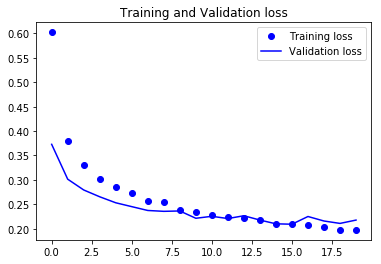

<Figure size 432x288 with 0 Axes>

In [27]:
#test loss has been significantly reduced.
#Plotting accuracy and loss plots between training and validaton data

accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Validation loss")
plt.legend()
plt.figure()
plt.show()

In [0]:
# We can see that validation loss and accuracy is in sync with Training loss and accuracy. It shows that model is not overfitting
#Predict the labels. Round of the decimal to integer valuesusing np.round(). Using argmax() to convert one hot encoding vector to classes

# Predict Lables

In [29]:
predicted_classes = fashion_model.predict(test_x)
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)
predicted_classes.shape, test_y.shape

((10000,), (10000,))

Found 9167 correct labels


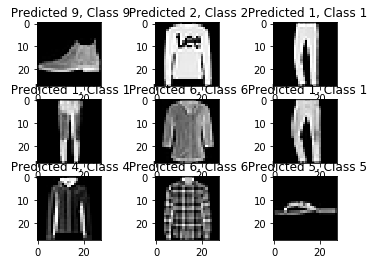

In [34]:
correct = np.where(predicted_classes == test_y)[0]
print("Found {} correct labels".format(len(correct)))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_x[correct].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title(" Predicted {}, Class {}".format(predicted_classes[correct], test_y[correct]))
    plt.tight_layout

Found 833 incorrect labels


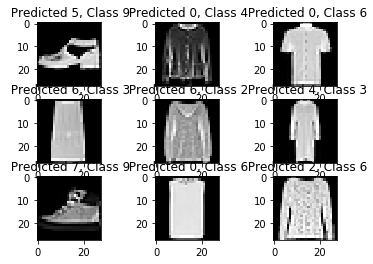

In [35]:
incorrect = np.where(predicted_classes != test_y)[0]
print("Found {} incorrect labels".format(len(incorrect)))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_x[incorrect].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title(" Predicted {}, Class {}".format(predicted_classes[incorrect], test_y[incorrect]))
    plt.tight_layout


# Classification Report

In [36]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.91      0.85      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.84      0.91      0.87      1000
     Class 3       0.95      0.91      0.93      1000
     Class 4       0.87      0.84      0.86      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.83      0.70      0.76      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

